# 2020 NFL Statistic Webscraping and Visualization Project   
_By Alec Plante and James Hong_  
  
This project was originally created in March of 2021, but I am uploading it to GitHub in June of 2022.  
This file only contains the Data Visualization and Manipulation parts of the project, while the adjacent file Web Scrapes the data and puts it into a CSV.  
To demonstrate the progression of the code, I will not be changing the code itself, only adding markdown sections

In [2]:
####################### Alec Plante and James Hong | 3.26.21 #######################

## Import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
## Regarding the 2020 NFL Season

## Question 1: What is the distribution of the Ages of people who threw a ball?
## Question 2: What is the relationship between Age groups and yards?
## Question 3: What is the relationship between sacks and yards?
## Question 4: What is the relationship between age and season wins?

In [3]:
## importing the CSV that we websrapped
#df = pd.read_csv(r"C:filepath")
url = "https://raw.githubusercontent.com/AlecPlante/NFLStats2020/main/stats.csv"
df = pd.read_csv(url)

In [4]:
## Question: What is the distribution of the Ages of people who threw a ball?
df2=pd.DataFrame(df, columns=["Age"]) ## Takes only the age column and creates a new dataframe
nAges=df2.max()- df2.min() ## Finds the range of ages

(20.0, 45.0, 0.0, 20.0)

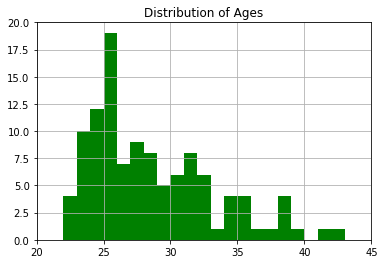

In [5]:
## This Histogram displays the amount of players who threw a pass by age

plt.hist(df2,bins=int(nAges), color = "green")## Makes a histogram that gives each age their own bar
plt.title("Distribution of Ages")
plt.grid()
plt.axis([20,45,0,20])

# Most of the players are under 30. only 2 players are above 40.

Text(0.5, 1.0, 'Distribution of Ages')

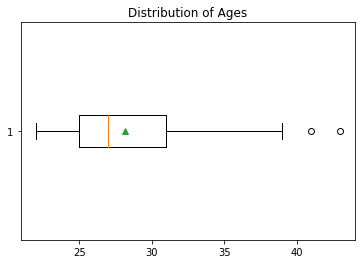

In [6]:
## Boxplot of the distribution of ages. 
plt.boxplot(df2,vert=False,showmeans=True,) ## Makes a horizontal boxplot with the 
plt.title("Distribution of Ages")
## lt.axis([20,45,0,2]) ## (xstart, xend, ystart, yend)

In [7]:
## Question: What is the relationship between Age groups and yards?

df1=pd.DataFrame(df, columns=["Age", "Yds"]) ## Makes a new dataframe with only age and yard columns

In [8]:
## We are want to add up yards by age group [20s, 30s ,& 40s]
df1edit = df1 ## Duplicating in case we need df1 later

## This for loop will convert all of the age values to the age group number (28->20; 33->30)
for i in range(0,len(df1edit)):
    df1edit.loc[i,"Age"]=int(df1edit.loc[i,"Age"])//10*10
AgesCt=df1edit.groupby("Age").count() ## Counts all the entries ofr each age
ydsPerAge = df1edit.groupby("Age")["Yds"].sum() ##adds up the total yards for a given age group
ydsPerAgeAdj = ydsPerAge.div(AgesCt['Yds']) ## Gives the yds for an age group / total people 


Text(0.5, 1.0, 'Passing Yards by Age')

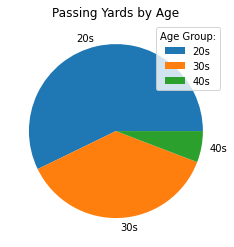

In [9]:
## Create a pie chart listing the total yards for each age group
labels=["20s","30s","40s"] ## Labels that we will use in our pie chart
plt.pie(ydsPerAge,labels=labels) 
plt.legend(title="Age Group:")## adds legend
plt.title("Passing Yards by Age") ## adds title

Text(0.5, 1.0, 'Passing Yards by Age (Adjusted)')

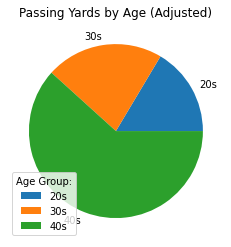

In [10]:
## Create a pie chart listing the average yards per person for each age group
labels=["20s","30s","40s"] ## Labels that we will use in our pie chart
plt.pie(ydsPerAgeAdj,labels=labels) 
plt.legend(title="Age Group:")## adds legend
plt.title("Passing Yards by Age (Adjusted)") ## adds title

## older quarterbacks have much higher average yards that younger players. This is likely because the only old quarterbacks remaining need to be good, or they would be replaced by someone younger. 
    # This stat may be effected by the number of young players who only threw the ball a few times. This would significantly decrease the yards per person.

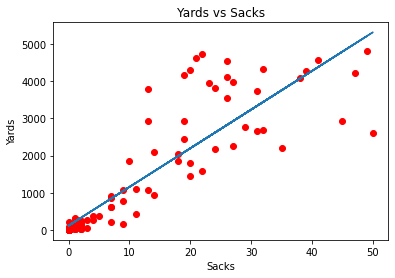

In [11]:
## Question: What is the relationship between sacks and yards?
df3 = pd.DataFrame(df, columns=["Yds", "Sk"]) ## makes a dataframe with only the sacks and yards columns
plt.scatter(data = df3,x="Sk", y="Yds", color="red") ## makes a scatter plot between the 2 varriables
plt.title("Yards vs Sacks")
plt.ylabel("Yards")
plt.xlabel("Sacks")
m,b = np.polyfit(df3["Sk"], df3["Yds"],1) ## Getting varriables for regression line
plt.plot(df3["Sk"],m*df3["Sk"]+b) ## drawing regression line

## there is a strong positive correlation between the two. This makes sense, as Quarterbacks who throw the ball more are more likely to have more yards and get sacked more. 


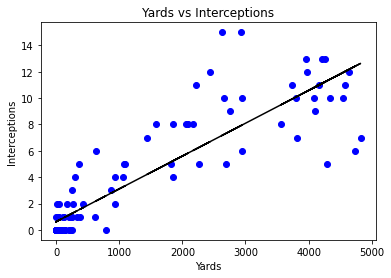

In [12]:
## What is the relationship between Yards and Interceptions?
df3 = pd.DataFrame(df, columns=["Yds", "Int"]) ## creates dataframe with only those 2 columns
plt.scatter(data = df3,x="Yds", y="Int", color="blue") ## Creates scatter plot between 2 varriables
plt.title("Yards vs Interceptions")
plt.ylabel("Interceptions")
plt.xlabel("Yards")
m,b = np.polyfit(df3["Yds"], df3["Int"],1) ## Gets varriables for the regression line
plt.plot(df3["Yds"],m*df3["Yds"]+b,color="black") ## Creates regression line
## More yards leads to more interceptions. This makes sense, as the more a quarter back throws a ball, the more likely they are to throw an interception or gain yards 


In [14]:
## Question: What is the relationship between age and season wins?
df4 = pd.DataFrame(df, columns=["Age", "QBrec"]) ## creates dataframe with Age and QBrecord
# print(len(df4))    => There are 112 Rows

## This for loop manipulates the strings in QBrec to extract the ammount of wins
for i in range(len(df4)):
    win=(str(df4.loc[i,"QBrec"])).find("-")
    if(win!= -1):
        df4.loc[i,"QBrec"]=np.int64(str(df4.loc[i,"QBrec"])[0:int(win)])
        df4.loc[i,"Age"]=int(df4.loc[i,"Age"])
    else:
        df4.loc[i,"QBrec"]=np.int64(0)

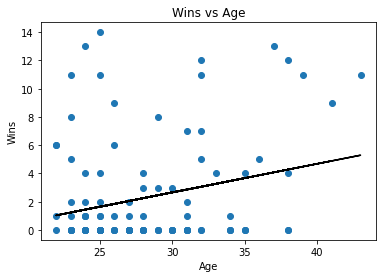

In [15]:
## Create a scatter plot to show the relationship between the Age and season wins
plt.scatter(data=df4, x = "Age", y="QBrec") ## Creates scatterplot
plt.title("Wins vs Age")
plt.ylabel("Wins")
plt.xlabel("Age")
X = np.array(df4["Age"]).astype(np.int64) ## Creates x varriable in a np array to work with the best fit line function
Y = np.array(df4["QBrec"]).astype(np.int64) ## Creates y varriable in a np array
m1,b1 = np.polyfit(X, Y,1) ## Gets varriables for the regression line
plt.plot(X, m1*X+ b1,color="black") ## Graphs regression line

## As you can see, the age marginally has a positive impact on the number of wins. Note: this relationship may be skewed, as many of the young players who threw the ball are not quarterbacks, and they only threw the ball on one play

This project was a good introduction into Data Visualization and Analytics with Python. If I were to continue this project, I would add the following things:
- More and different types of visualizations
- Prediction models, including but not limited to k means, regression, dbscan, etc.
- Better insights into the visualizations
- Address the problems with the data (only keep quarterbacks)
- Update to 2021 or 2022